# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [49]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy

In [50]:
df = pd.read_csv('previsao_de_renda.csv')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [52]:
df.shape

(15000, 15)

In [53]:
df = df.drop_duplicates()
df.shape

(15000, 15)

In [54]:
df.isna().sum()

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [55]:
df = df.dropna()
df.shape

(12427, 15)

In [56]:
# 1)

X = df.drop(columns = ['Unnamed: 0', 'data_ref', 'id_cliente', 'renda']).copy()

X.posse_de_veiculo = X.posse_de_veiculo.astype(int)
X.posse_de_imovel = X.posse_de_imovel.astype(int)

X = pd.get_dummies(X, drop_first = True)
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12427 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               12427 non-null  int32  
 1   posse_de_imovel                12427 non-null  int32  
 2   qtd_filhos                     12427 non-null  int64  
 3   idade                          12427 non-null  int64  
 4   tempo_emprego                  12427 non-null  float64
 5   qt_pessoas_residencia          12427 non-null  float64
 6   sexo_M                         12427 non-null  uint8  
 7   tipo_renda_Bolsista            12427 non-null  uint8  
 8   tipo_renda_Empresário          12427 non-null  uint8  
 9   tipo_renda_Pensionista         12427 non-null  uint8  
 10  tipo_renda_Servidor público    12427 non-null  uint8  
 11  educacao_Pós graduação         12427 non-null  uint8  
 12  educacao_Secundário            12427 non-null 

None


,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0,1,0,26,6.602740,1.0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1,1,1,0,28,7.183562,2.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,1,0,35,0.838356,2.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,1,30,4.846575,3.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,33,4.293151,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [57]:
X.rename(columns={'tipo_renda_Servidor público':'tipo_renda_Servidor_público',
                       'educacao_Pós graduação':'educacao_Pós_graduação',
                       'educacao_Superior completo':'educacao_Superior_completo',
                       'educacao_Superior incompleto': 'educacao_Superior_incompleto',
                       'tipo_residencia_Com os pais': 'tipo_residencia_Com_os_pais'}, inplace=True)

In [58]:
y =  df.loc[:,'renda']

y.head()

0    8060.34
1    1852.15
2    2253.89
3    6600.77
4    6475.97
Name: renda, dtype: float64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75)

In [60]:
# 2)  Regularização Ridge

alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]
r2_scores = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Encontra o melhor modelo de acordo com o R2
best_alpha = alphas[np.argmax(r2_scores)]
best_r2 = r2_scores[np.argmax(r2_scores)]
print(f"Melhor modelo: alpha = {best_alpha}, R2 = {best_r2:.2f}")

Melhor modelo: alpha = 0, R2 = 0.23


In [61]:
# 3)  Regularização Lasso

alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]
r2_scores = []
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

best_alpha = alphas[np.argmax(r2_scores)]
best_r2 = r2_scores[np.argmax(r2_scores)]
print(f"Melhor modelo: alpha = {best_alpha}, R2 = {best_r2:.2f}")

C:\Users\Diego\AppData\Local\Temp\ipykernel_7656\108396345.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
c:\Users\Diego\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Diego\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.529e+11, tolerance: 6.885e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\User

Melhor modelo: alpha = 0.1, R2 = 0.23


c:\Users\Diego\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.430e+11, tolerance: 6.885e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\Diego\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.568e+10, tolerance: 6.885e+07
  model = cd_fast.enet_coordinate_descent(


In [62]:
# 4) Modelo stepwise



# Transformar o y de series para array:



y_train =np.array(y_train)

def stepwise_selection(X_train, y_train, 
                      initial_list=[], 
                      threshold_in=0.05, 
                      threshold_out = 0.05, 
                      verbose=True):
   """ Perform a forward-backward feature selection 
   based on p-value from statsmodels.api.OLS
   Arguments:
       X - pandas.DataFrame with candidate features
       y - list-like with the target
       initial_list - list of features to start with (column names of X)
       threshold_in - include a feature if its p-value < threshold_in
       threshold_out - exclude a feature if its p-value > threshold_out
       verbose - whether to print the sequence of inclusions and exclusions
   Returns: list of selected features 
   Always set threshold_in < threshold_out to avoid infinite looping.
   See https://en.wikipedia.org/wiki/Stepwise_regression for the details
   """
   included = list(initial_list)
   while True:
       changed = False
       # forward step
       excluded = list(set(X_train.columns) - set(included))
       new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
       for new_column in excluded:
           model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[included+[new_column]]))).fit()
           new_pval[new_column] = model.pvalues[new_column]
       best_pval = new_pval.min()
       if best_pval < threshold_in:
           best_feature = new_pval.index[new_pval.argmin()]
           included.append(best_feature)
           changed = True
           if verbose:
               print('Add {:30} with p-value {:.6}'.format(best_feature, best_pval))
 
       # backward step
       print("#############")
       print(included)
       model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[included]))).fit()
       # use all coefs except intercept
       pvalues = model.pvalues.iloc[1:]
       worst_pval = pvalues.max() # null if pvalues is empty
       if worst_pval > threshold_out:
           changed=True
           worst_feature = pvalues.argmax()
           included.remove(worst_feature)
           if verbose:
               print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
       if not changed:
           break
   return included


variaveis = stepwise_selection(X_train, y_train)


print('resulting features:')
print(variaveis)

Add tempo_emprego                  with p-value 0.0
#############
['tempo_emprego']
Add sexo_M                         with p-value 1.42922e-272
#############
['tempo_emprego', 'sexo_M']
Add tipo_renda_Empresário          with p-value 1.1283e-06
#############
['tempo_emprego', 'sexo_M', 'tipo_renda_Empresário']
Add idade                          with p-value 7.59094e-07
#############
['tempo_emprego', 'sexo_M', 'tipo_renda_Empresário', 'idade']
Add educacao_Superior_completo     with p-value 7.24118e-05
#############
['tempo_emprego', 'sexo_M', 'tipo_renda_Empresário', 'idade', 'educacao_Superior_completo']
Add qt_pessoas_residencia          with p-value 0.00600587
#############
['tempo_emprego', 'sexo_M', 'tipo_renda_Empresário', 'idade', 'educacao_Superior_completo', 'qt_pessoas_residencia']
Add posse_de_imovel                with p-value 0.00768134
#############
['tempo_emprego', 'sexo_M', 'tipo_renda_Empresário', 'idade', 'educacao_Superior_completo', 'qt_pessoas_residencia', 'poss

In [63]:
modelo = '''y_train ~ tempo_emprego + sexo_M + tipo_renda_Empresário +
              idade + educacao_Superior_completo + qt_pessoas_residencia'''

reg_stepwise = smf.ols(modelo, data = X_train).fit()
reg_stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     557.2
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:29:45   Log-Likelihood:                -96224.
No. Observations:                9320   AIC:                         1.925e+05
Df Residuals:                    9313   BIC:                         1.925e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -3434.0354    464.977     -7.385      0.000   -4345.492   -2522.579
tempo_emprego                544.2559     12.174     44.706      0.000     520.392     568.120
sexo_M                      5965.1795    161.759     36.877      0.000    5648.096    6282.263
tipo_renda_Empresário        850.4694    171.681      4.954      0.000     513.937    1187.002
idade                         51.8424      8.959      5.787      0.000      34.281      69.404
educacao_Superior_completo   631.2456    159.033      3.969      0.000     319.506     942.985
qt_pessoas_residencia        231.3626     84.190      2.748      0.006      66.331     396.394
==============================================================================
Omnibus:                    12092.297   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3844431.743
Skew:                           7.045   Prob(JB):                         0.00
Kurtosis:                     101.495   Cond. No.                         262.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# R² na base teste:

y_pred = reg_stepwise.predict(X_test[variaveis])
r2_score(y_test, y_pred)

0.23370285987983885

In [66]:
# 6)

reg = smf.ols('''np.log(y_train) ~ tempo_emprego + sexo_M + tipo_renda_Empresário +
              idade + educacao_Superior_completo + qt_pessoas_residencia''', data = X_train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(y_train)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     860.3
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:30:22   Log-Likelihood:                -10166.
No. Observations:                9320   AIC:                         2.035e+04
Df Residuals:                    9313   BIC:                         2.040e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.0761      0.045    155.783      0.000       6.987       7.165
tempo_emprego                  0.0617      0.001     51.899      0.000       0.059       0.064
sexo_M                         0.7952      0.016     50.325      0.000       0.764       0.826
tipo_renda_Empresário          0.1424      0.017      8.493      0.000       0.110       0.175
idade                          0.0065      0.001      7.429      0.000       0.005       0.008
educacao_Superior_completo     0.1241      0.016      7.987      0.000       0.094       0.155
qt_pessoas_residencia          0.0296      0.008      3.601      0.000       0.013       0.046
==============================================================================
Omnibus:                        0.308   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.857   Jarque-Bera (JB):                0.274
Skew:                          -0.003   Prob(JB):                        0.872
Kurtosis:                       3.026   Cond. No.                         262.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# R² na base teste:

y_pred = reg.predict(X_test[variaveis])
r2_score(np.log(y_test), y_pred)

0.34328163905147335

In [68]:
# 7)

arvore_reg = DecisionTreeRegressor(max_depth=6)

arvore_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6)

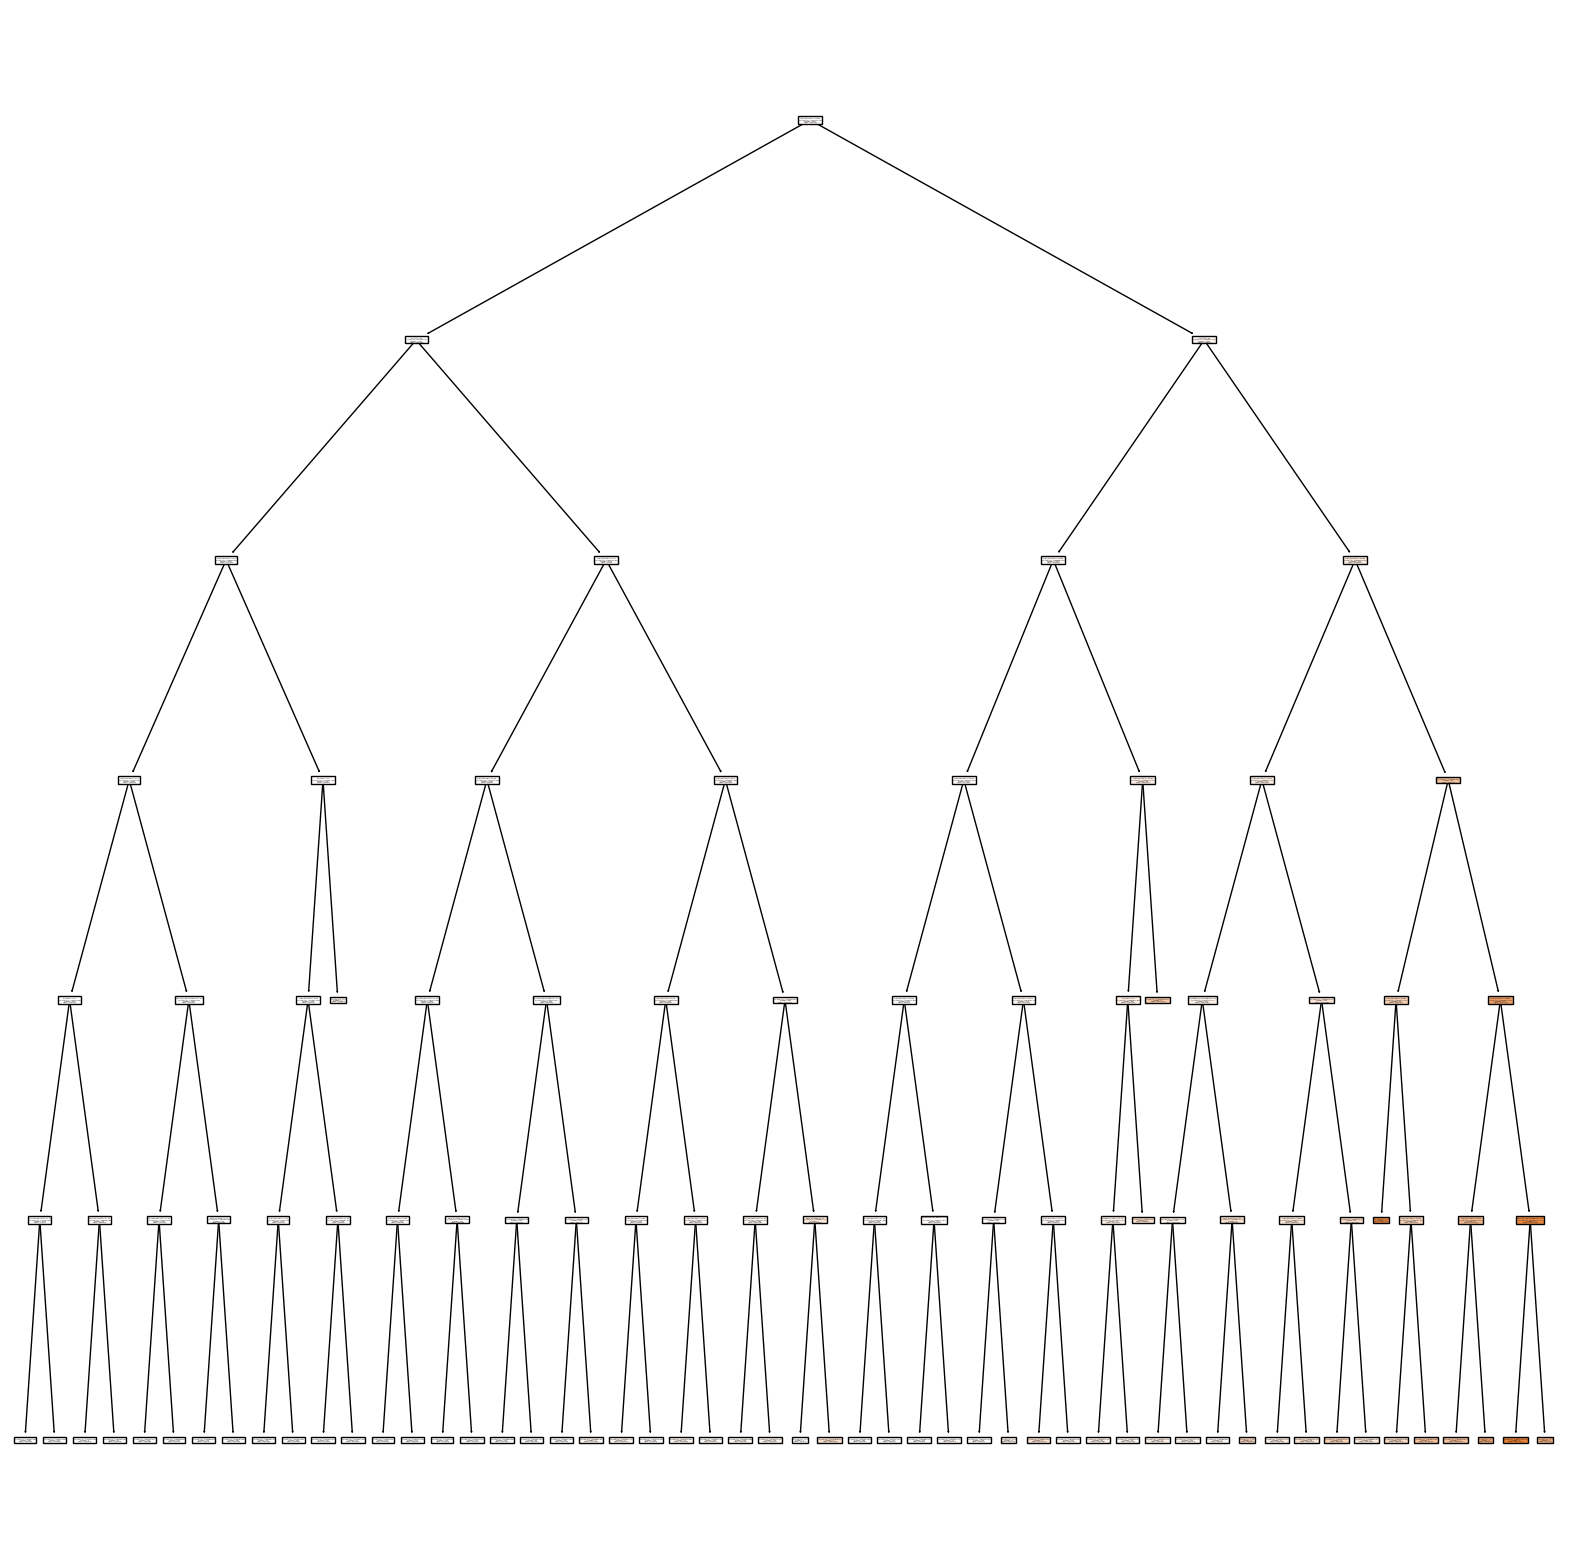

In [69]:
plt.rc('figure', figsize = (20,20))
tp = tree.plot_tree(arvore_reg,
                   feature_names = X_train.columns,
                   filled = True)

In [70]:
r2 = arvore_reg.score(X_test, y_test)

print(f"R-quadrado na base de testes: {r2:.2f}")

R-quadrado na base de testes: 0.49
